In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import matplotlib.pyplot as plt
import random
import numpy as np

## initialize `G_baseline` network

In [36]:
random.seed(0)
np.random.seed(0)

N = 10000
INIT_EXPOSED = int(N*0.01)

from seirsplus.networks import generate_demographic_contact_network, household_country_data

demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7], isolation_groups=[])

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10


Generated overall age distribution:
0-9: 0.1179	(-0.0031 from target)
10-19: 0.1252	(-0.0058 from target)
20-29: 0.1423	(0.0053 from target)
30-39: 0.1343	(0.0013 from target)
40-49: 0.1211	(-0.0029 from target)
50-59: 0.1276	(-0.0034 from target)
60-69: 0.1152	(0.0002 from target)
70-79: 0.0743	(0.0043 from target)
80+: 0.0421	(0.0041 from target)

Generated household size distribution:
1: 0.3001	(0.0164 from target)
2: 0.3337	(-0.0114 from target)
3: 0.1442	(-0.0065 from target)
4: 0.1242	(-0.0034 from target)
5: 0.0614	(0.0036 from target)
6: 0.0222	(-0.0005 from target)
7: 0.0141	(0.0017 from target)
Num households: 4105
mean household size: 2.448393594

Generating graph for 0-9...


/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [37]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

## correlated pooling

In [ ]:
test_model = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    initE = INIT_EXPOSED)

sim_correlated = SimulationRunner(
    model=test_model,
    pooling_strategy='correlated',
    T = 50,
    num_groups = 10,
    pool_size = 30,
    seed = 0,
    save_results=False,
)

sim_correlated.run_simulation()

In [ ]:
sim_correlated.model.figure_infections(plot_percentages=False)

In [ ]:
plt.plot([sim_correlated.overall_results[i]["cumInfections"] for i in range(len(sim_correlated.overall_results))], label="cumulative infections")
plt.plot([sim_correlated.overall_results[i]["cumActiveInfections"] for i in range(len(sim_correlated.overall_results))], label="active infections")
plt.plot([sim_correlated.overall_results[i]["cumRecovered"] for i in range(len(sim_correlated.overall_results))], label="cumulative recovered")
plt.plot([sim_correlated.overall_results[i]["cum_positives_identified"] for i in range(len(sim_correlated.overall_results))], label="cumulative identified")

plt.legend()

## Naive pooling

In [11]:
random.seed(0)
np.random.seed(0)

N = 1000
INIT_EXPOSED = int(N*0.01)

from seirsplus.networks import generate_demographic_contact_network, household_country_data

demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7], isolation_groups=[])

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10


Generated overall age distribution:
0-9: 0.1140	(-0.0070 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1440	(0.0110 from target)
40-49: 0.1170	(-0.0070 from target)
50-59: 0.1290	(-0.0020 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0500	(0.0120 from target)

Generated household size distribution:
1: 0.3259	(0.0422 from target)
2: 0.2988	(-0.0463 from target)
3: 0.1160	(-0.0346 from target)
4: 0.1481	(0.0205 from target)
5: 0.0691	(0.0114 from target)
6: 0.0346	(0.0119 from target)
7: 0.0074	(-0.0051 from target)
Num households: 405
mean household size: 2.448393594

Generating graph for 0-9...


/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [12]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

test_model = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    initE = INIT_EXPOSED)

sim_naive = SimulationRunner(
    model = test_model,
    pooling_strategy='naive',
    T = 50,
    num_groups = 10,
    pool_size = 30,
    seed = 0,
    save_results = False
)

sim_naive.run_simulation()

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.98it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-- node 857 is transitioning EtoIPRE at time 0.13998990588025415 with timer_state: [0.13998991]; 1/sigma: [2.47955085]; VL: 0.0
** ERROR01: timer_state is less than 1/sigma for node 857 at time 0.13998990588025415 for transition EtoIPRE
{'t': 0.13998990588025415, 'transitionNode': 857, 'transitionNodeVL': 0.2887397194357262, 'transitionType': 'EtoIPRE'}
{'t': 0.13998990598502606, 'transitionNode': 858, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.13998990622491872, 'transitionNode': 409, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.13998990674621098, 'transitionNode': 408, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 0.13998990747582382, 'transitionNode': 856, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
-- node 409 is transitioning EtoIPRE at time 0.23063898889353207 with timer_state: [0.09064908]; 1/sigma: [1.4123484]; VL: 7.068220309394702e-09
** ERROR01: timer_state is less than 1/sigma for node 409 at time 0.23063898889353207 for trans

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'t': 3.7949769732764076, 'transitionNode': 330, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
-- node 300 is transitioning EtoIPRE at time 3.825228137114436 with timer_state: [3.45668014]; 1/sigma: [1.19567869]; VL: 9.640293352871742
{'t': 3.825228137114436, 'transitionNode': 300, 'transitionNodeVL': 9.640293352871742, 'transitionType': 'EtoIPRE'}
-- node 739 is transitioning ISYMtoR at time 3.915237834059039 with timer_state: [2.57988453]; 1/gamma: [6.52188621]; VL: 6.728393242306364
** ERROR01: timer_state is less than 1/gamma for node 739 at time 3.915237834059039 for transition ISYMtoR
{'t': 3.915237834059039, 'transitionNode': 739, 'transitionNodeVL': 6.728393242306364, 'transitionType': 'ISYMtoR'}
-- node 515 is transitioning EtoIPRE at time 3.91838385157952 with timer_state: [0.25114521]; 1/sigma: [1.07923499]; VL: 1.9224660811065133
** ERROR01: timer_state is less than 1/sigma for node 515 at time 3.91838385157952 for transition EtoIPRE
{'t': 3.91838385157952, 'transition

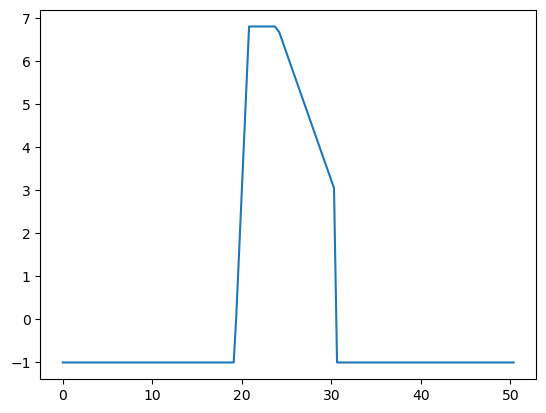

In [33]:
plt.plot(
    sim_naive.model.VL_over_time["time_points"],
    sim_naive.model.VL_over_time["VL_time_series"][812]
)

In [34]:
sim_naive.model.VL_params_by_node[812]

{'critical_time_points': [1.4412790052369129, 4.589786263534579, 11.0, 11.0],
 'peak_plateau_height': 6.808364888580147,
 'tail_height': 3.0122661777496202}

In [35]:
print(
    sim_naive.model.sigma[812], 1/sim_naive.model.sigma[812][0],
    sim_naive.model.lamda[812], 1/sim_naive.model.lamda[812][0],
    sim_naive.model.gamma[812], 1/sim_naive.model.gamma[812][0],
    sim_naive.model.gamma_Q_sym[812], 1/sim_naive.model.gamma[812][0],
    sim_naive.model.eta[812]
)


[0.69382819] 1.4412790052369129 [0.31761083] 3.1485072582976663 [0.15600104] 6.410213736465421 [0.15600104] 6.410213736465421 [0]


{'t': 19.35958126382683, 'transitionNode': 812, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 20.864216658393893, 'transitionNode': 812, 'transitionNodeVL': 6.808364888580147, 'transitionType': 'EtoIPRE'}
{'t': 21.364289310611195, 'transitionNode': 812, 'transitionNodeVL': 6.808364888580147, 'transitionType': 'IPREtoISYM'}
{'t': 42.51246640819365, 'transitionNode': 812, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}


Text(0.5, 1.0, 'Recorded viral load (solid) and underlying model values (dashed)')

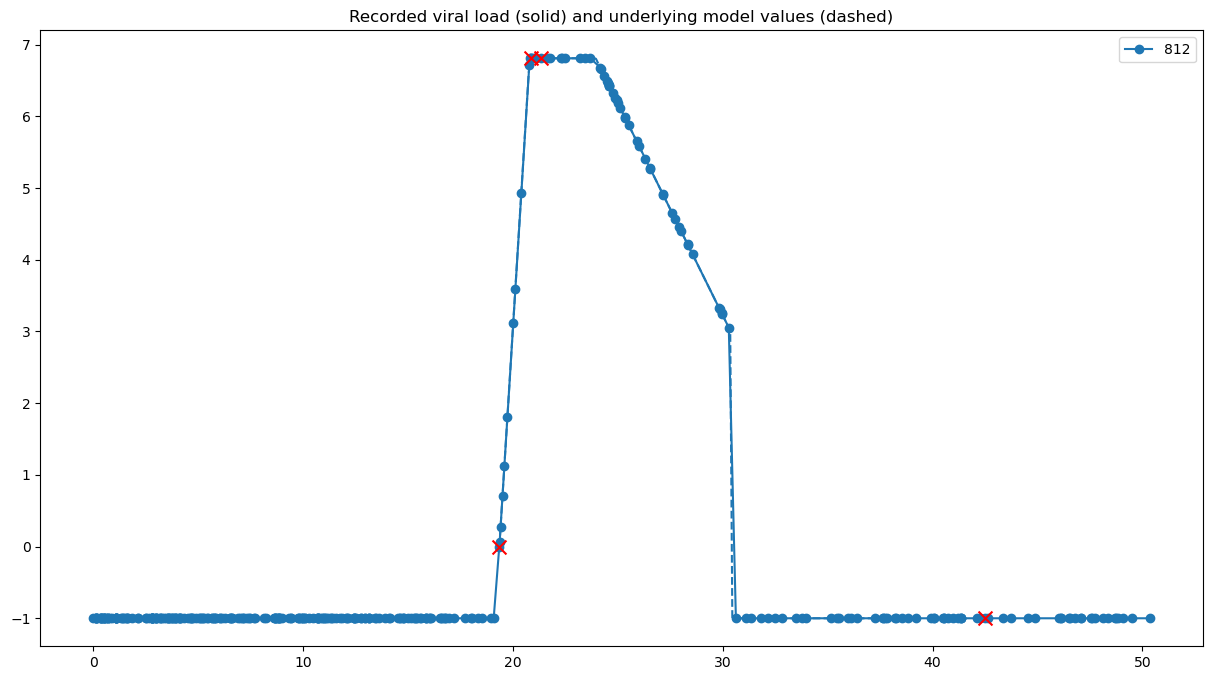

In [36]:
from seirsplus.calibration import _get_vl_with_plateau

plt.figure(figsize=(15,8))

for i in [812]:
    # plot recorded infection curves (recording times = times at which a transition happened;
    # might be sparse if initial prevalence is low)
    plt.plot(
        sim_naive.model.VL_over_time["time_points"],
        sim_naive.model.VL_over_time["VL_time_series"][i],
        '-o',
        label=str(i), 
    )

    # plot underlying model values to make sure the recorded values match
    tmp = []
    time_range = np.linspace(
        sim_naive.model.infection_start_times[i], 
        sim_naive.model.infection_start_times[i] + 20, 
        201
    )
    for t in time_range:
        tmp.append(
            _get_vl_with_plateau(
                critical_time_points = sim_naive.model.VL_params_by_node[i]["critical_time_points"],
                peak_plateau_height = sim_naive.model.VL_params_by_node[i]["peak_plateau_height"],
                tail_height = sim_naive.model.VL_params_by_node[i]["tail_height"],
                sample_time = t - sim_naive.model.infection_start_times[i]
            )
        )
    plt.plot(time_range, tmp, '--', color=plt.gca().lines[-1].get_color())

    for log in [log for log in sim_naive.model.transitions_log if log["transitionNode"]==i]:
        print(log)
        plt.scatter(log["t"], log["transitionNodeVL"], color="red", marker="x", s=100, zorder=20)
    

plt.legend()

plt.title("Recorded viral load (solid) and underlying model values (dashed)")

In [18]:
[(log["t"], log["transitionNodeVL"]) for log in sim_naive.model.transitions_log if log["transitionNode"]==812]

[(19.35958126382683, 0.0),
 (20.864216658393893, 6.808364888580147),
 (21.364289310611195, 6.808364888580147),
 (42.51246640819365, -1.0)]

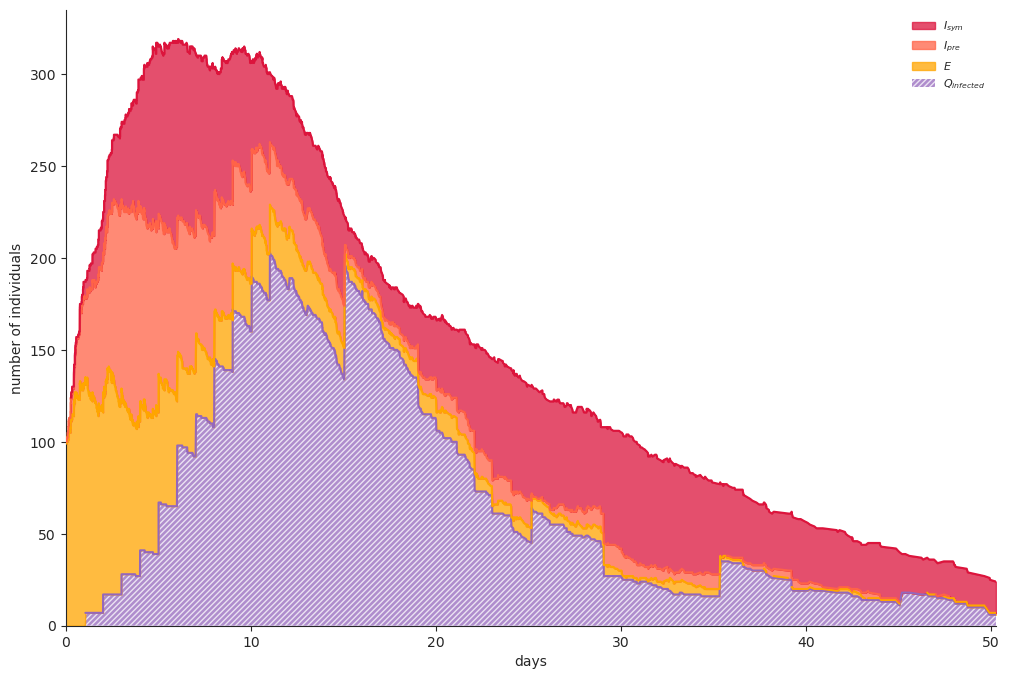

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [43]:
sim_naive.model.figure_infections(plot_percentages=False)

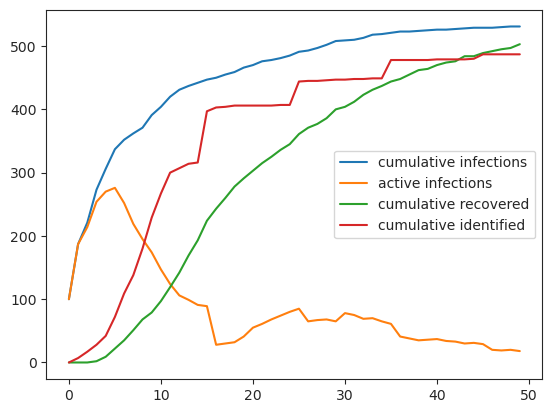

In [44]:
plt.plot([sim_naive.overall_results[i]["cumInfections"] for i in range(len(sim_correlated.overall_results))], label="cumulative infections")
plt.plot([sim_naive.overall_results[i]["cumActiveInfections"] for i in range(len(sim_correlated.overall_results))], label="active infections")
plt.plot([sim_naive.overall_results[i]["cumRecovered"] for i in range(len(sim_correlated.overall_results))], label="cumulative recovered")
plt.plot([sim_naive.overall_results[i]["cum_positives_identified"] for i in range(len(sim_correlated.overall_results))], label="cumulative identified")

plt.legend()

In [45]:
metrics = sim_correlated.overall_results[0].keys()
metrics = set(metrics) - {"day"}

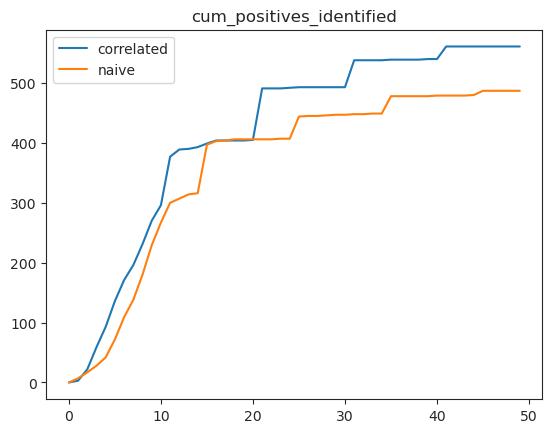

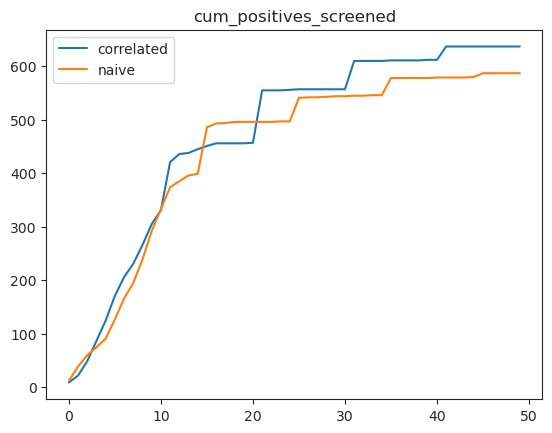

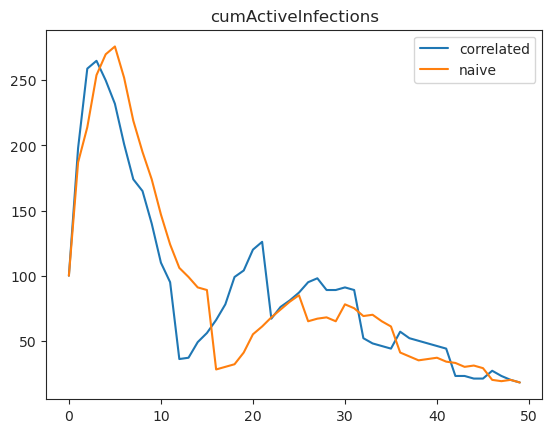

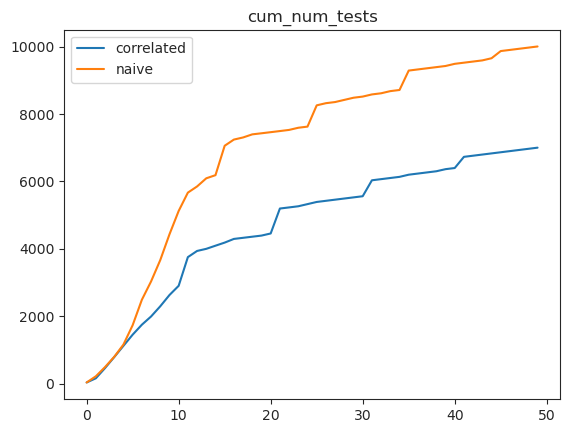

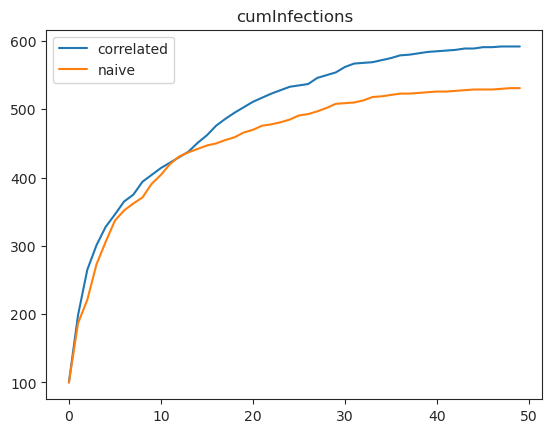

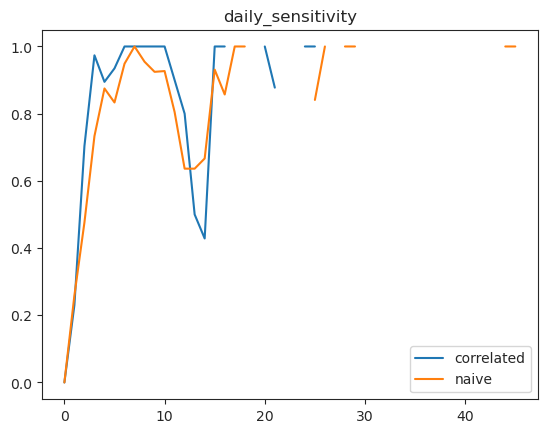

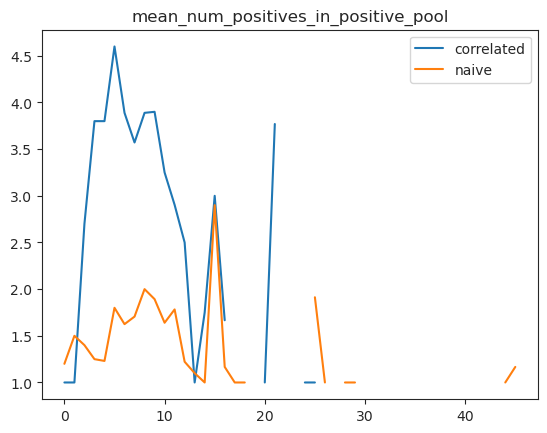

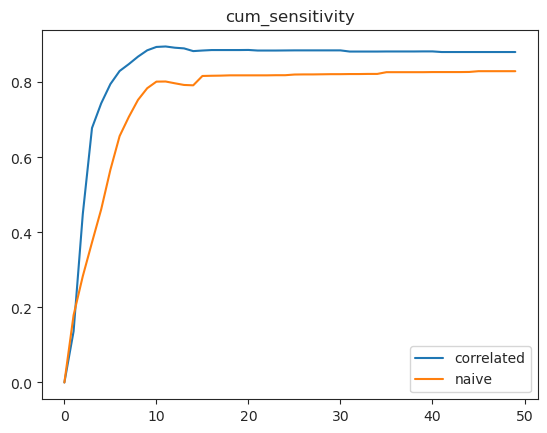

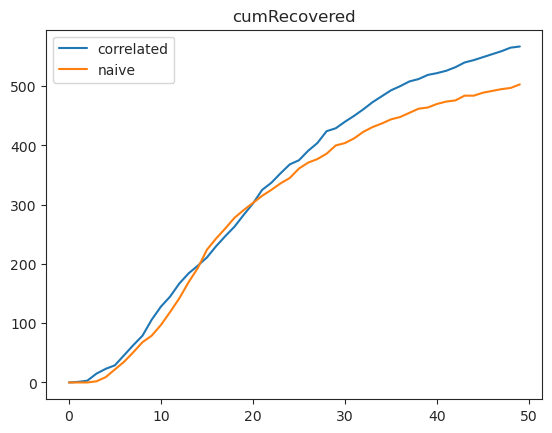

In [46]:
for metric in metrics:
    plt.plot([result[metric] for result in sim_correlated.overall_results])
    plt.plot([result[metric] for result in sim_naive.overall_results])
    plt.title(metric)
    plt.legend(['correlated', 'naive'])
    plt.show()